# TP 5 - exercice 3

E = espace des suites de longueur $d$ composées de 0 et de 1 

$$f : E \mapsto \mathbb{R}^+$$

$$X_n^1 = [0,1,1,0,...,1, 0]$$
 
$$X_n^2 = [1,1,0,0,...,1, 1]$$
 
$$ ...$$
 
$$X_n^M = [0,0,1,1,...,0, 0]$$

$$ X_n \stackrel{\text{mutation}}{\longrightarrow} Y
\stackrel{\text{croisement}}{\longrightarrow} Z
\stackrel{\text{selection}}{\longrightarrow} X_{n+1}
$$

Dans ce cas le probabilité de choisir l'inividu z1 est:

$$ \frac{f(z_i)}{f(z_1) + \cdots + f(z_M)} $$
 
 
 
Mais on peut choisir d'autres probabilités, par exemple propotionnelles au *rang* de l'individu dans le calssement de l'adaptation. Ou encore faire un choix cohérent avec le recuit simulé ou la probabilité est :

$$ \frac{​​​​\exp(k\ f(z_i))}{​​​​\exp(k\ f(z_1)) + \cdots + \exp(k\ f(z_M))}​​​​ $$
où le paramètre $k$ joue le role de l'inverse de température $k=1/T$
.





## Exercice 3 : sac à dos


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand,randint

In [2]:
n_items = 25
max_val = 30 # valeur maximal d'un item
max_poids = 20 # poids max d'un item

In [3]:
#Collection d'objets 
poids = randint(0,max_poids,n_items)
valeurs = randint(0,max_val,n_items)
print("poids",poids)
print("valeurs",valeurs)

poids [19 14 15  4  1 18 11 10 19 10  6 14  4 11 12  7  2  7 10  7  9 15 13  8
 10]
valeurs [15  4 15  8 23 15 25 20  5 29  3 12 21 15  8 13 22 20  5 11 21 28  9 15
 24]


In [4]:
# poids maximale pour le sac à dos
PM = 10 * n_items
PM 

250

In [5]:
#Taille de population (M)
taille_pop = 70 

# proba de mutation 
# en moyenne, 1 individu sur 3 aura une coeff modifié
proba_mut = 1 / n_items / 3

#nombre de générations = 300

In [6]:
def fitness(individu):
    # individu x = (x_0,x_1,...,x_n) : tableau de 0 et de 1, de longueur n_items
    # fitness est le somme de x_i *v_i
    # mais fitness vaut 0 si la somme de poids dépasse PM du sac à dos
    poids_total = individu.dot(poids) # dot = produit scalaire 
    val_total = individu.dot(valeurs)
    if poids_total <= PM :
        return val_total
    else:
        return 0

In [7]:
# test
x = randint(0,2,n_items) # individu
print(x)
print(fitness(x))

[0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1]
300


In [8]:
def population_init():
    # Population initial se compose d'individus tirés au hasard
    return [randint(0,2,n_items) for _ in range(taille_pop)]

In [9]:
# Test 
a = population_init()
for i in range(5):
    print(a[i])

[1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1]
[0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1]
[1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1]
[0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1]
[0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1]


In [10]:
def mutation(population):
    # Change chaque coeff indépendamment avec une petite proba (proba_mut)
    for individu in population:
        for i in range(n_items):
            if rand() < proba_mut:
                individu[i] = 1 - individu[i]
    # Rien a retourner, la population (des coefficients) on été modifié "sur place"
    

In [11]:
# Test
mutation(a)
for i in range(5):
    print(a[i])

[1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1]
[0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1]
[1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1]
[0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1]
[0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1]


In [12]:
def loi_discrete(p):
    #TP 2
    F = np.cumsum(p)
    i = 0
    choix = rand()
    while choix > F[i]:
        i+=1
    return i

In [13]:
def cycle_de_vie(pop):
    # 1. Mutation
    mutation(pop)
    
    # 2. Croisements (parents = deux individu consécutifs)
    enfants = [] 
    for i in range(taille_pop//2):
        parent1 = pop[2*i]
        parent2 = pop[2*i+1]
        c_ind = randint(0,n_items) # indice de croisement
        
        enfant1 = np.zeros(n_items,dtype = int)
        enfant1[0:c_ind] = parent1[0:c_ind]   
        enfant1[c_ind:] = parent2[c_ind:]  
        
        enfant2 = np.zeros(n_items,dtype = int)
        enfant2[0:c_ind] = parent2[0:c_ind]   
        enfant2[c_ind:] = parent1[c_ind:]  
        
        enfants.append(enfant1)
        enfants.append(enfant2)
        
    # 3. Selection
    fitness_enf =[fitness(e) for e in enfants]
    const_norm = sum(fitness_enf)
    # probabilités de selection 
    proba_sel = [fit/const_norm for fit in fitness_enf]
    
    # Construction de la génération suivante
    #choix avec remise
    next_gen = []
    for i in range(taille_pop):
        k = loi_discrete(proba_sel)
        next_gen.append(enfants[k])
    return next_gen    

In [14]:
# Test 
b = cycle_de_vie(a)
for i in range(5):
    print(b[i])

[1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1]
[0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1]
[1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1]
[1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0]
[0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1]


# Evolution

In [15]:
np.random.seed(42)
population = population_init()
nbr_gen = 10000
for i in range(nbr_gen):
    population = cycle_de_vie(population)
    if i % 500 == 0:
        # affiche des résultats partiels
        best_fit_this_gen = max([fitness(ind) for ind in population])
        print("Génération" ,i ,"best fitness",best_fit_this_gen)

Génération 0 best fitness 282
Génération 500 best fitness 344
Génération 1000 best fitness 352
Génération 1500 best fitness 347
Génération 2000 best fitness 340
Génération 2500 best fitness 348
Génération 3000 best fitness 334
Génération 3500 best fitness 373
Génération 4000 best fitness 344
Génération 4500 best fitness 362
Génération 5000 best fitness 358
Génération 5500 best fitness 348
Génération 6000 best fitness 366
Génération 6500 best fitness 358
Génération 7000 best fitness 334
Génération 7500 best fitness 327
Génération 8000 best fitness 362
Génération 8500 best fitness 323
Génération 9000 best fitness 358
Génération 9500 best fitness 375


In [16]:
np.random.seed(42)
population = population_init()
nbr_gen = 10000
best_fit_ever = 0

for i in range(nbr_gen):
    population = cycle_de_vie(population)
    best_fit_this_gen = max([fitness(ind) for ind in population])
    if best_fit_this_gen > best_fit_ever:
        best_fit_ever = best_fit_this_gen
        print("Génération" ,i ,"best fitness",best_fit_this_gen)

Génération 0 best fitness 282
Génération 1 best fitness 296
Génération 2 best fitness 318
Génération 4 best fitness 328
Génération 6 best fitness 341
Génération 13 best fitness 342
Génération 15 best fitness 368
Génération 80 best fitness 371
Génération 142 best fitness 373
Génération 204 best fitness 378
Génération 206 best fitness 381
Génération 323 best fitness 383


In [17]:
# Exercice : Trouver l'individu qui a la meilleure fitness

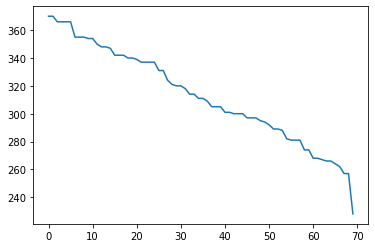

In [18]:
# Composition de la population 
pop_tri = sorted(population,key=fitness,reverse =True)
distribution_fit = list(map(fitness,pop_tri))
plt.plot(distribution_fit)
plt.show()